In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import re
import random

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michał\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michał\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Michał\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data

df = pd.read_csv('twitter_training.csv', header=0)
df.rename(columns={'im getting on borderlands and i will murder you all ,': 'text', 'Positive': 'sentiment'}, inplace=True)

In [4]:
df["sentiment"] = df["sentiment"].replace({
    "Negative": -1,
    "Neutral": 0,
    "Irrelevant": 0,
    "Positive": 1
})

C:\Users\Michał\AppData\Local\Temp\ipykernel_1992\1994105104.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace({


In [5]:
df

,2401,Borderlands,sentiment,text
0,2401,Borderlands,1,I am coming to the borders and I will kill you...
1,2401,Borderlands,1,im getting on borderlands and i will kill you ...
2,2401,Borderlands,1,im coming on borderlands and i will murder you...
3,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,1,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,1,Just realized that the Windows partition of my...
74677,9200,Nvidia,1,Just realized that my Mac window partition is ...
74678,9200,Nvidia,1,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,1,Just realized between the windows partition of...


In [6]:
# Funkcja do czyszczenia tekstu
def clean_text(text):

    try:
        text = str(text)
    except:
        return ""
    
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [7]:
df['cleaned_text'] = df['text'].apply(clean_text)
df = df[['sentiment','text','cleaned_text']]

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

In [8]:
df

,sentiment,text,cleaned_text
0,1,I am coming to the borders and I will kill you...,coming border kill
1,1,im getting on borderlands and i will kill you ...,im getting borderland kill
2,1,im coming on borderlands and i will murder you...,im coming borderland murder
3,1,im getting on borderlands 2 and i will murder ...,im getting borderland 2 murder
4,1,im getting into borderlands and i can murder y...,im getting borderland murder
...,...,...,...
74676,1,Just realized that the Windows partition of my...,realized window partition mac like 6 year behi...
74677,1,Just realized that my Mac window partition is ...,realized mac window partition 6 year behind nv...
74678,1,Just realized the windows partition of my Mac ...,realized window partition mac 6 year behind nv...
74679,1,Just realized between the windows partition of...,realized window partition mac like 6 year behi...


In [9]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Trening modelu
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [11]:
# Predykcja
y_pred = model.predict(X_test)

In [12]:
# Ewaluacja modelu
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.67      0.63      0.65      4471
           0       0.61      0.70      0.65      6212
           1       0.64      0.54      0.59      4254

    accuracy                           0.63     14937
   macro avg       0.64      0.62      0.63     14937
weighted avg       0.64      0.63      0.63     14937



In [13]:
# Funkcje do wizualizacji
def plot_sentiment_distribution(df):
    plt.figure(figsize=(10, 6))
    sentiment_counts = df['sentiment'].value_counts().sort_index()
    sentiment_labels = {1: 'Pozytywny', 0: 'Neutralny', -1: 'Negatywny'}
    
    colors = ['#ff9999', '#66b3ff', '#9999ff']
    plt.bar(range(len(sentiment_counts)), 
            sentiment_counts.values,
            color=colors)
    
    plt.xticks(range(len(sentiment_counts)), 
               [sentiment_labels[i] for i in sentiment_counts.index])
    plt.title('Rozkład sentymentu w datasecie')
    plt.ylabel('Liczba tweetów')
    plt.show()

def plot_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Macierz pomyłek')
    plt.xlabel('Przewidziana klasa')
    plt.ylabel('Prawdziwa klasa')
    plt.show()

def plot_wordcloud_by_sentiment(df):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    sentiments = {-1: 'Negatywny', 0: 'Neutralny', 1: 'Pozytywny'}
    
    for sentiment, title in sentiments.items():
        text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
        wordcloud = WordCloud(width=800, height=400, 
                            background_color='white',
                            max_words=100).generate(text)
        
        idx = sentiment + 1
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].axis('off')
        axes[idx].set_title(f'Najczęstsze słowa - {title} sentyment')
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(model, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    plt.figure(figsize=(15, 8))
    
    for idx, sentiment in enumerate(['Negatywny', 'Neutralny', 'Pozytywny']):
        # Pobieramy wagi dla danej klasy
        weights = model.coef_[idx]
        top_features = np.argsort(weights)[-10:]
        
        plt.subplot(1, 3, idx+1)
        plt.barh(range(10), weights[top_features])
        plt.yticks(range(10), [feature_names[i] for i in top_features])
        plt.title(f'Top 10 cech - {sentiment}')
        plt.xlabel('Waga cechy')
    
    plt.tight_layout()
    plt.show()

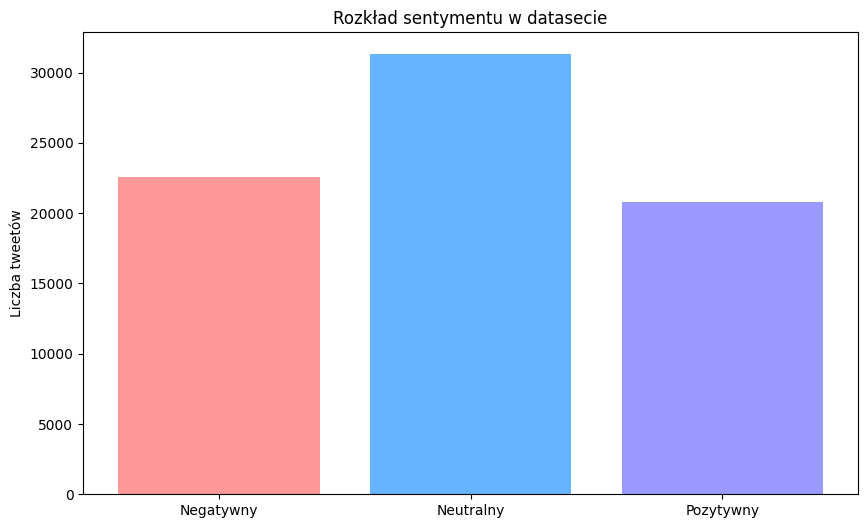

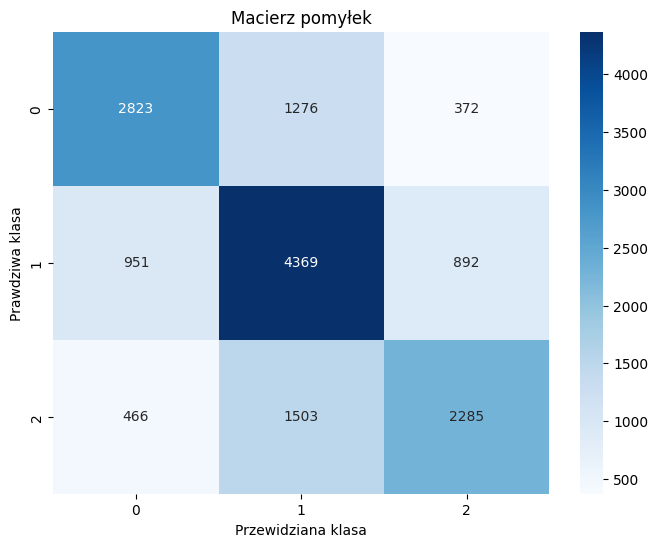

In [14]:
# Generowanie wykresów
plot_sentiment_distribution(df)
plot_confusion_matrix(y_test, y_pred)

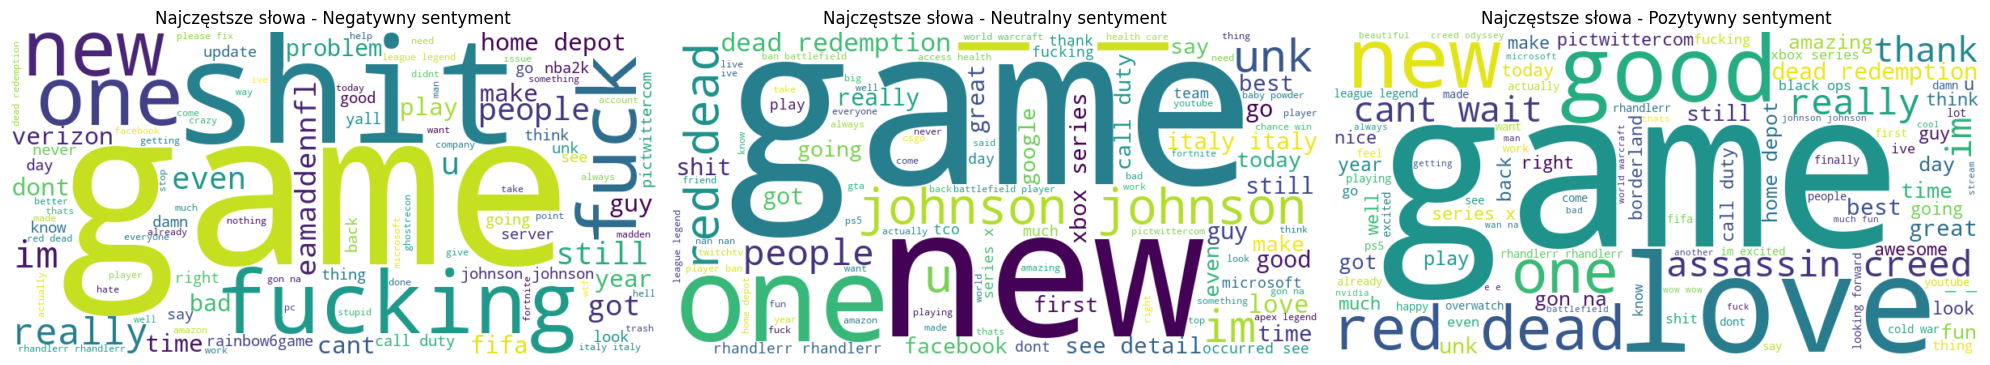

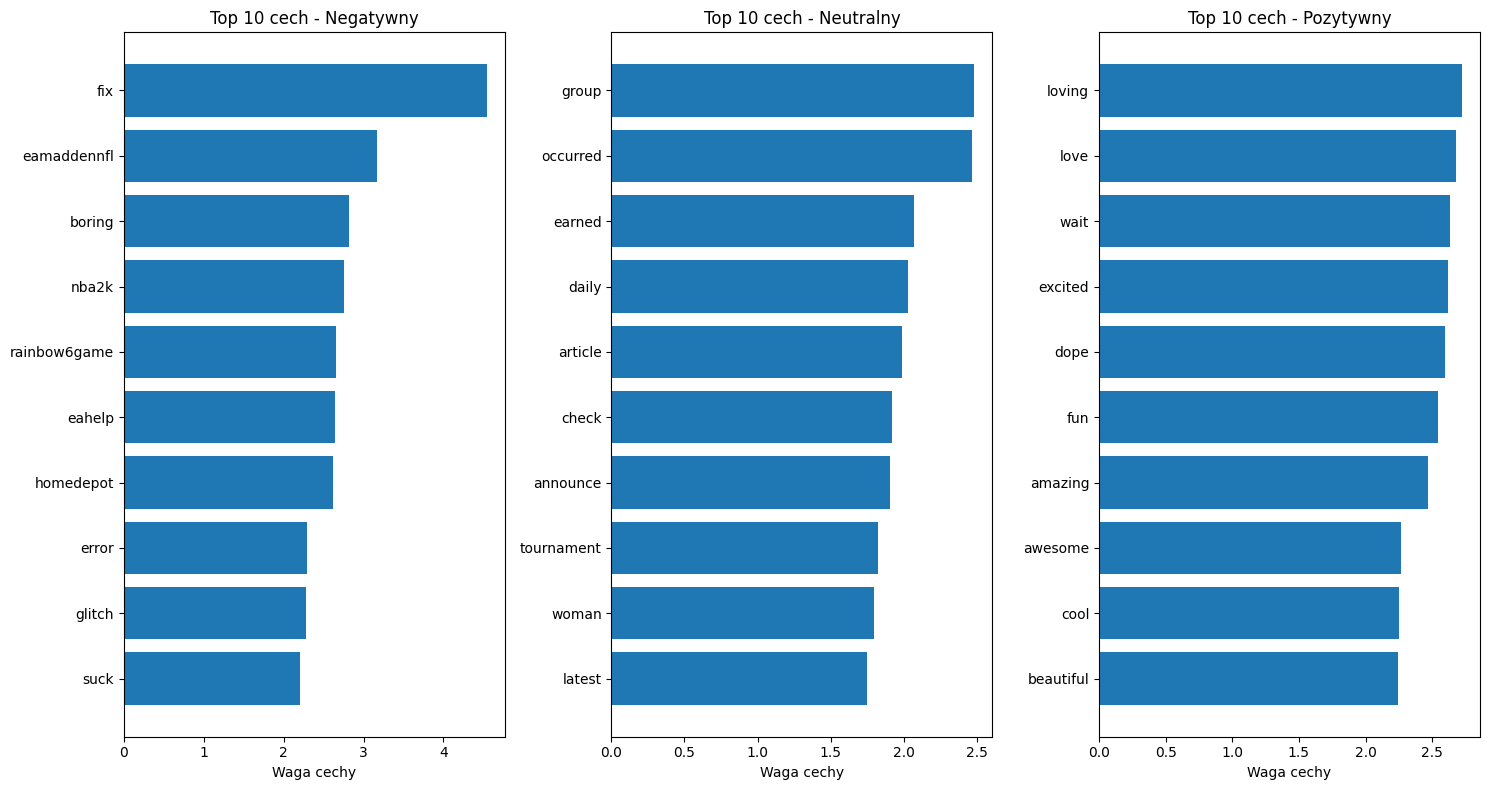

In [15]:
plot_wordcloud_by_sentiment(df)
plot_feature_importance(model, vectorizer)

In [40]:
# Porównanie poprzedniego gotowego modelu (TextBlob) z nowym, który wytrenowaliśmy sami

def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0.1 else -1 if analysis.sentiment.polarity < -0.1 else 0

def compare_predictions(df, logistic_predictions, textblob_predictions):
    df['logistic_pred'] = logistic_predictions
    df['textblob_pred'] = textblob_predictions
    df['agreement'] = df['logistic_pred'] == df['textblob_pred']

    plt.figure(figsize=(10, 5))
    agreement_count = df['agreement'].value_counts()
    colors = ['lightgreen' if x else 'salmon' for x in agreement_count.index]
    agreement_count.plot(kind='bar', color=colors)
    plt.title('Porównanie zgodności modeli')
    plt.xlabel('Zgody')
    plt.ylabel('Liczba tweetow')
    plt.tight_layout()
    plt.show()

def analyze_sentiments(df):
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df['cleaned_text'])
    y = df['sentiment']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    logistic_predictions = model.predict(X_test)
    textblob_predictions = df.iloc[y_test.index]['cleaned_text'].apply(get_textblob_sentiment)

    print("Regresja logistyczna:")
    print(classification_report(y_test, logistic_predictions))
    print("Textblob:")
    print(classification_report(y_test, textblob_predictions))

    test_df = df.iloc[y_test.index].copy()
    compare_predictions(test_df, logistic_predictions, textblob_predictions)
    
    return model, vectorizer

Regresja logistyczna:
              precision    recall  f1-score   support

          -1       0.67      0.63      0.65      4471
           0       0.61      0.70      0.65      6212
           1       0.64      0.54      0.59      4254

    accuracy                           0.63     14937
   macro avg       0.64      0.62      0.63     14937
weighted avg       0.64      0.63      0.63     14937

Textblob:
              precision    recall  f1-score   support

          -1       0.52      0.40      0.45      4471
           0       0.45      0.44      0.44      6212
           1       0.42      0.54      0.47      4254

    accuracy                           0.46     14937
   macro avg       0.46      0.46      0.46     14937
weighted avg       0.46      0.46      0.45     14937



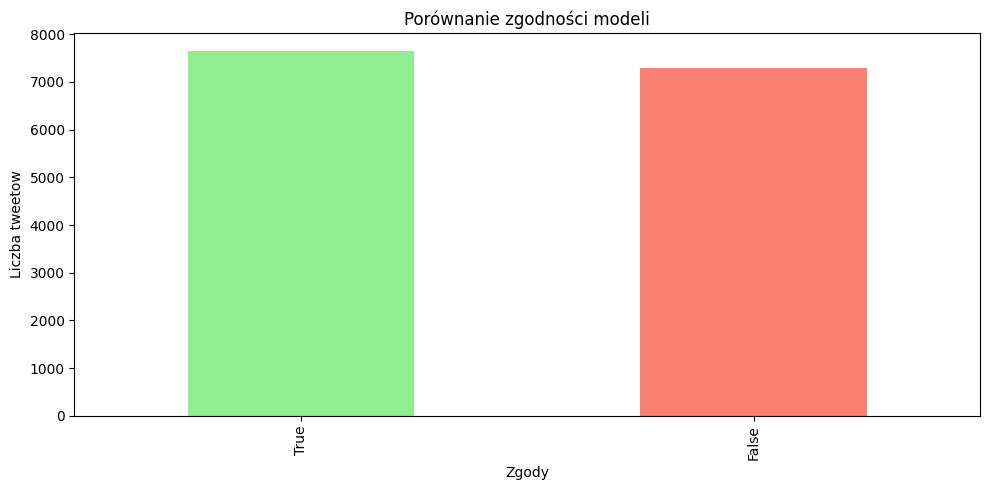

In [41]:
model, vectorizer = analyze_sentiments(df)
